# Count of Hospitals and Licensed Beds (2017 - 2022)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Cleaning    

In [15]:
dat = pd.read_excel('Count_of_Facilities.xlsx')
dat.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,License Bed Type,Unnamed: 8
0,County,City,HHS Region,Facility,Ownership,Metro Status,License Type,Acute,Psych
1,ANDERSON,Palestine,4,Palestine Regional Medical Center,For-Profit,NON-METRO,Acute,160,NaN
2,ANDREWS,Andrews,9,Permian Regional Medical Center,Public,NON-METRO,Acute,34,NaN
3,ANGELINA,Lufkin,5,CHI St. Luke's Health Memorial Lufkin,Non-Profit,NON-METRO,Acute,279,NaN
4,NaN,NaN,NaN,Oceans Behavioral Hospital of Lufkin,For-Profit,NON-METRO,Psych,NaN,24


In [16]:
dat = dat.rename(columns= dat.iloc[0])
dat = dat.drop(0)
dat.head()


,County,City,HHS Region,Facility,Ownership,Metro Status,License Type,Acute,Psych
1,ANDERSON,Palestine,4,Palestine Regional Medical Center,For-Profit,NON-METRO,Acute,160,NaN
2,ANDREWS,Andrews,9,Permian Regional Medical Center,Public,NON-METRO,Acute,34,NaN
3,ANGELINA,Lufkin,5,CHI St. Luke's Health Memorial Lufkin,Non-Profit,NON-METRO,Acute,279,NaN
4,NaN,NaN,NaN,Oceans Behavioral Hospital of Lufkin,For-Profit,NON-METRO,Psych,NaN,24
5,NaN,NaN,NaN,Woodland Heights Medical Center,For-Profit,NON-METRO,Acute,149,NaN


In [33]:
dat = dat.infer_objects(0)
dat['Total'] = dat['Acute'] + dat['Psych']
dat.head()

,County,City,HHS Region,Facility,Ownership,Metro Status,License Type,Acute,Psych,Total
1,ANDERSON,Palestine,4,Palestine Regional Medical Center,For-Profit,NON-METRO,Acute,160,0,160
2,ANDREWS,Andrews,9,Permian Regional Medical Center,Public,NON-METRO,Acute,34,0,34
3,ANGELINA,Lufkin,5,CHI St. Luke's Health Memorial Lufkin,Non-Profit,NON-METRO,Acute,279,0,279
4,0,0,0,Oceans Behavioral Hospital of Lufkin,For-Profit,NON-METRO,Psych,0,24,24
5,0,0,0,Woodland Heights Medical Center,For-Profit,NON-METRO,Acute,149,0,149


### Analysis

In [ ]:
median = dat['Total'].median()
mean = dat['Total'].mean()
print(f'Mean is {mean.round(0)} and median is {median}')

Mean is 147.0 and median is 60.0


In [50]:
#(dat['Total'] >= 60).sum()
count = dat[dat['Total'] >= 60].shape[0]
print(f'There are {count} facilities that have more than or the same amount of beds as the median number of total beds.')

There are 308 facilities that have more than or the same amount of beds as the median number of total beds.


<Axes: xlabel='County'>

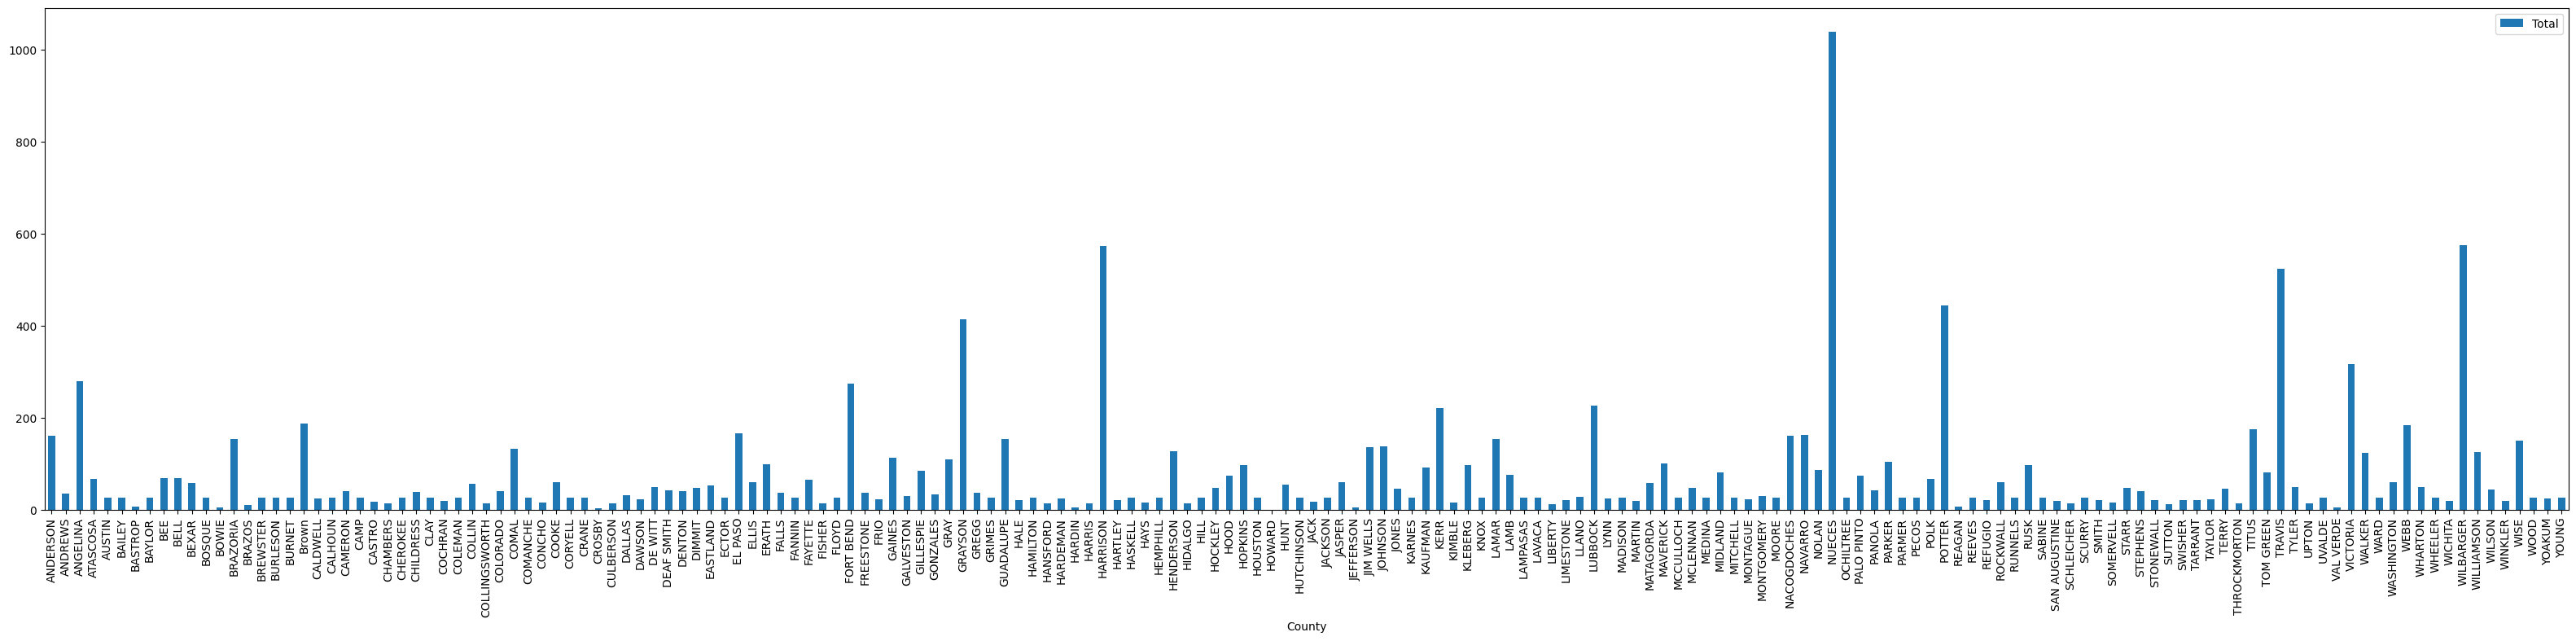

In [66]:
agg_data = dat.groupby('County')['Total'].sum().reset_index()
agg_data = agg_data.drop(0)
agg_data.plot(x = 'County', y = 'Total', figsize = (40,8), kind = 'bar')

Fig 1. The above data shows the amount of total beds in each county.  

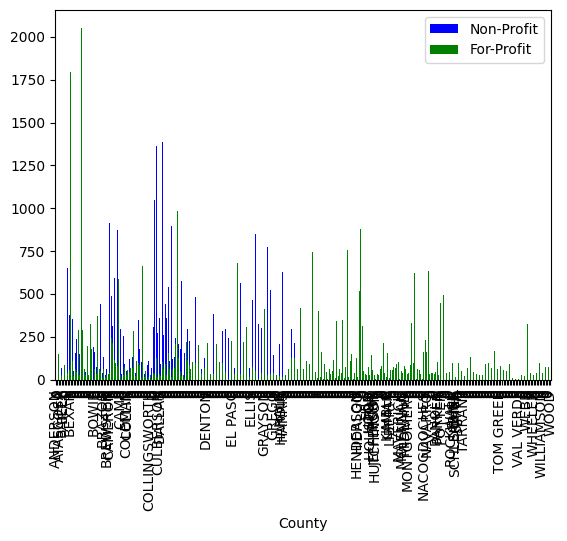

In [82]:
nonprofit = dat[(dat['Ownership'] == 'Non-Profit')]
forprofit = dat[dat['Ownership'] == 'For-Profit']

ax = nonprofit.plot(x = 'County', y = 'Total', kind = 'bar', color = 'blue', label = 'Non-Profit')
forprofit.plot(x = 'County', y = 'Total', kind = 'bar', ax = ax, color = 'green', label = 'For-Profit')
plt.legend(labels = ['Non-Profit', 'For-Profit'])

Fig 2. This graph shows the total beds per county, while also showing the organization-type (nonprofit v. profit) for each data point. 

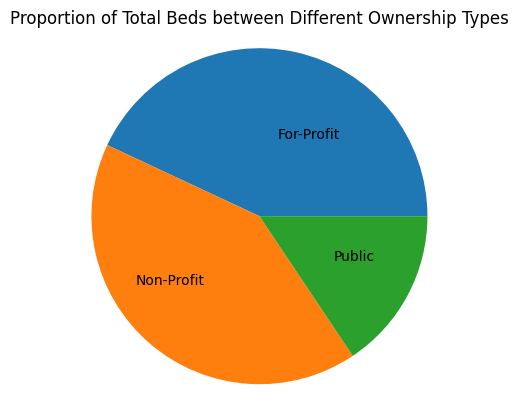

In [103]:
ownershiptotals = dat.groupby('Ownership')['Total'].sum()
ownershiptotals = ownershiptotals.drop(0) #remove the weird row where ownershiptype is just '0'

plt.pie(ownershiptotals, labels = ownershiptotals.index, labeldistance= 0.5)
plt.axis('equal') #makes sure plot is a circle
plt.title('Proportion of Total Beds between Different Ownership Types')
plt.show()

Fig 3. Pie graph that shows proportion of total beds that each ownership type contains  